In [1]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as stats

#file locations
#data file
csv_file_2004 ="CENSUS_and_POPULATION_FINAL_2004.csv"

##NOTES###
#this dataset doesn't include Alaska,all counties were removed bc county names didn't match**
##Lousiana, also**
##It DOES include DC, and counts it as a state**





In [2]:
#read CSV files
analysis_data_2004= pd.read_csv(csv_file_2004)
analysis_data_2004

,Location,County,State,State_Code,Party,Candidate,Total_Votes,County_Pop_2004
0,"Alabama, Autauga",Autauga,Alabama,AL,democrat,John Kerry,20081,48366
1,"Alabama, Autauga",Autauga,Alabama,AL,republican,George W. Bush,20081,48366
2,"Alabama, Baldwin",Baldwin,Alabama,AL,democrat,John Kerry,69320,156266
3,"Alabama, Baldwin",Baldwin,Alabama,AL,republican,George W. Bush,69320,156266
4,"Alabama, Barbour",Barbour,Alabama,AL,democrat,John Kerry,10777,28287
...,...,...,...,...,...,...,...,...
5987,"Wyoming, Uinta",Uinta,Wyoming,WY,republican,George W. Bush,8081,19470
5988,"Wyoming, Washakie",Washakie,Wyoming,WY,democrat,John Kerry,4114,7960
5989,"Wyoming, Washakie",Washakie,Wyoming,WY,republican,George W. Bush,4114,7960
5990,"Wyoming, Weston",Weston,Wyoming,WY,democrat,John Kerry,3392,6646


In [3]:
analysis_data_2004["Avg_Turnout"] = (analysis_data_2004.Total_Votes / analysis_data_2004.County_Pop_2004)
analysis_data_2004

,Location,County,State,State_Code,Party,Candidate,Total_Votes,County_Pop_2004,Avg_Turnout
0,"Alabama, Autauga",Autauga,Alabama,AL,democrat,John Kerry,20081,48366,0.415188
1,"Alabama, Autauga",Autauga,Alabama,AL,republican,George W. Bush,20081,48366,0.415188
2,"Alabama, Baldwin",Baldwin,Alabama,AL,democrat,John Kerry,69320,156266,0.443603
3,"Alabama, Baldwin",Baldwin,Alabama,AL,republican,George W. Bush,69320,156266,0.443603
4,"Alabama, Barbour",Barbour,Alabama,AL,democrat,John Kerry,10777,28287,0.380988
...,...,...,...,...,...,...,...,...,...
5987,"Wyoming, Uinta",Uinta,Wyoming,WY,republican,George W. Bush,8081,19470,0.415049
5988,"Wyoming, Washakie",Washakie,Wyoming,WY,democrat,John Kerry,4114,7960,0.516834
5989,"Wyoming, Washakie",Washakie,Wyoming,WY,republican,George W. Bush,4114,7960,0.516834
5990,"Wyoming, Weston",Weston,Wyoming,WY,democrat,John Kerry,3392,6646,0.510382


In [4]:
analysis_data_2004['Location'].value_counts()

Florida, Lake            2
Utah, Summit             2
Wyoming, Campbell        2
Illinois, Saline         2
Missouri, Henry          2
                        ..
Georgia, Fulton          2
Virginia, King George    2
West Virginia, Hardy     2
Minnesota, Jackson       2
Alabama, Washington      2
Name: Location, Length: 2996, dtype: int64

In [5]:
#checking an unusually high rate for Loving, Texas
texas_error_fix = analysis_data_2004[analysis_data_2004['County']=='Loving']
texas_error_fix

,Location,County,State,State_Code,Party,Candidate,Total_Votes,County_Pop_2004,Avg_Turnout
5140,"Texas, Loving",Loving,Texas,TX,democrat,John Kerry,80,55,1.454545
5141,"Texas, Loving",Loving,Texas,TX,republican,George W. Bush,80,55,1.454545


In [6]:
# 1. What is the overall average voter turnout for 2004 per (((state))), and per county
State_Avg_Turnout = round((analysis_data_2004.groupby('State_Code')['Avg_Turnout'].mean() * 100), 2)

State_Avg_Voter_Turnout = pd.DataFrame(State_Avg_Turnout)
State_Avg_Voter_Turnout_1 = State_Avg_Voter_Turnout.reset_index()
State_Avg_Voter_Turnout_1


,State_Code,Avg_Turnout
0,AL,41.65
1,AR,38.24
2,AZ,34.53
3,CA,39.37
4,CO,50.24
5,CT,46.48
6,DC,40.09
7,DE,43.92
8,FL,45.28
9,GA,36.49


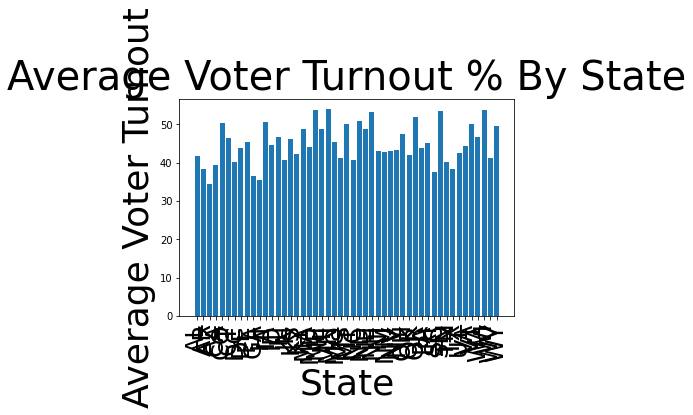

In [7]:
#Bar Graph

Avg_Turnout = State_Avg_Voter_Turnout_1["Avg_Turnout"]
State =  State_Avg_Voter_Turnout_1["State_Code"]
plt.bar(State, Avg_Turnout)
plt.title('Average Voter Turnout % By State', fontsize=40)
plt.xlabel('State', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=24)
plt.rcParams["figure.figsize"] = [40, 20]

plt.show()

In [8]:
# 1. What is the overall average voter turnout for 2004 per state, and per (((county)))
County_Avg_Turnout = round((analysis_data_2004.groupby('Location')['Avg_Turnout'].mean() * 100), 2)
County_Avg_Turnout

County_Avg_Voter_Turnout = pd.DataFrame(County_Avg_Turnout)
County_Avg_Voter_Turnout_1 = County_Avg_Voter_Turnout.reset_index()

In [20]:


error_search =  County_Avg_Voter_Turnout_1[County_Avg_Voter_Turnout_1['Avg_Turnout']==145.45]
print(error_search)

           Location  Avg_Turnout
2570  Texas, Loving       145.45


In [11]:
Sample_County = County_Avg_Voter_Turnout_1.sample(n = 50)
Sample_County

,Location,Avg_Turnout
969,"Kentucky, Boone",44.71
999,"Kentucky, Fulton",39.73
1096,"Maine, Washington",49.28
215,"Colorado, Adams",35.52
1410,"Missouri, Cole",50.67
2502,"Texas, Gaines",27.80
1117,"Maryland, Talbot",52.70
1993,"Ohio, Medina",52.05
2345,"Tennessee, DeKalb",39.74
1374,"Mississippi, Tunica",27.54


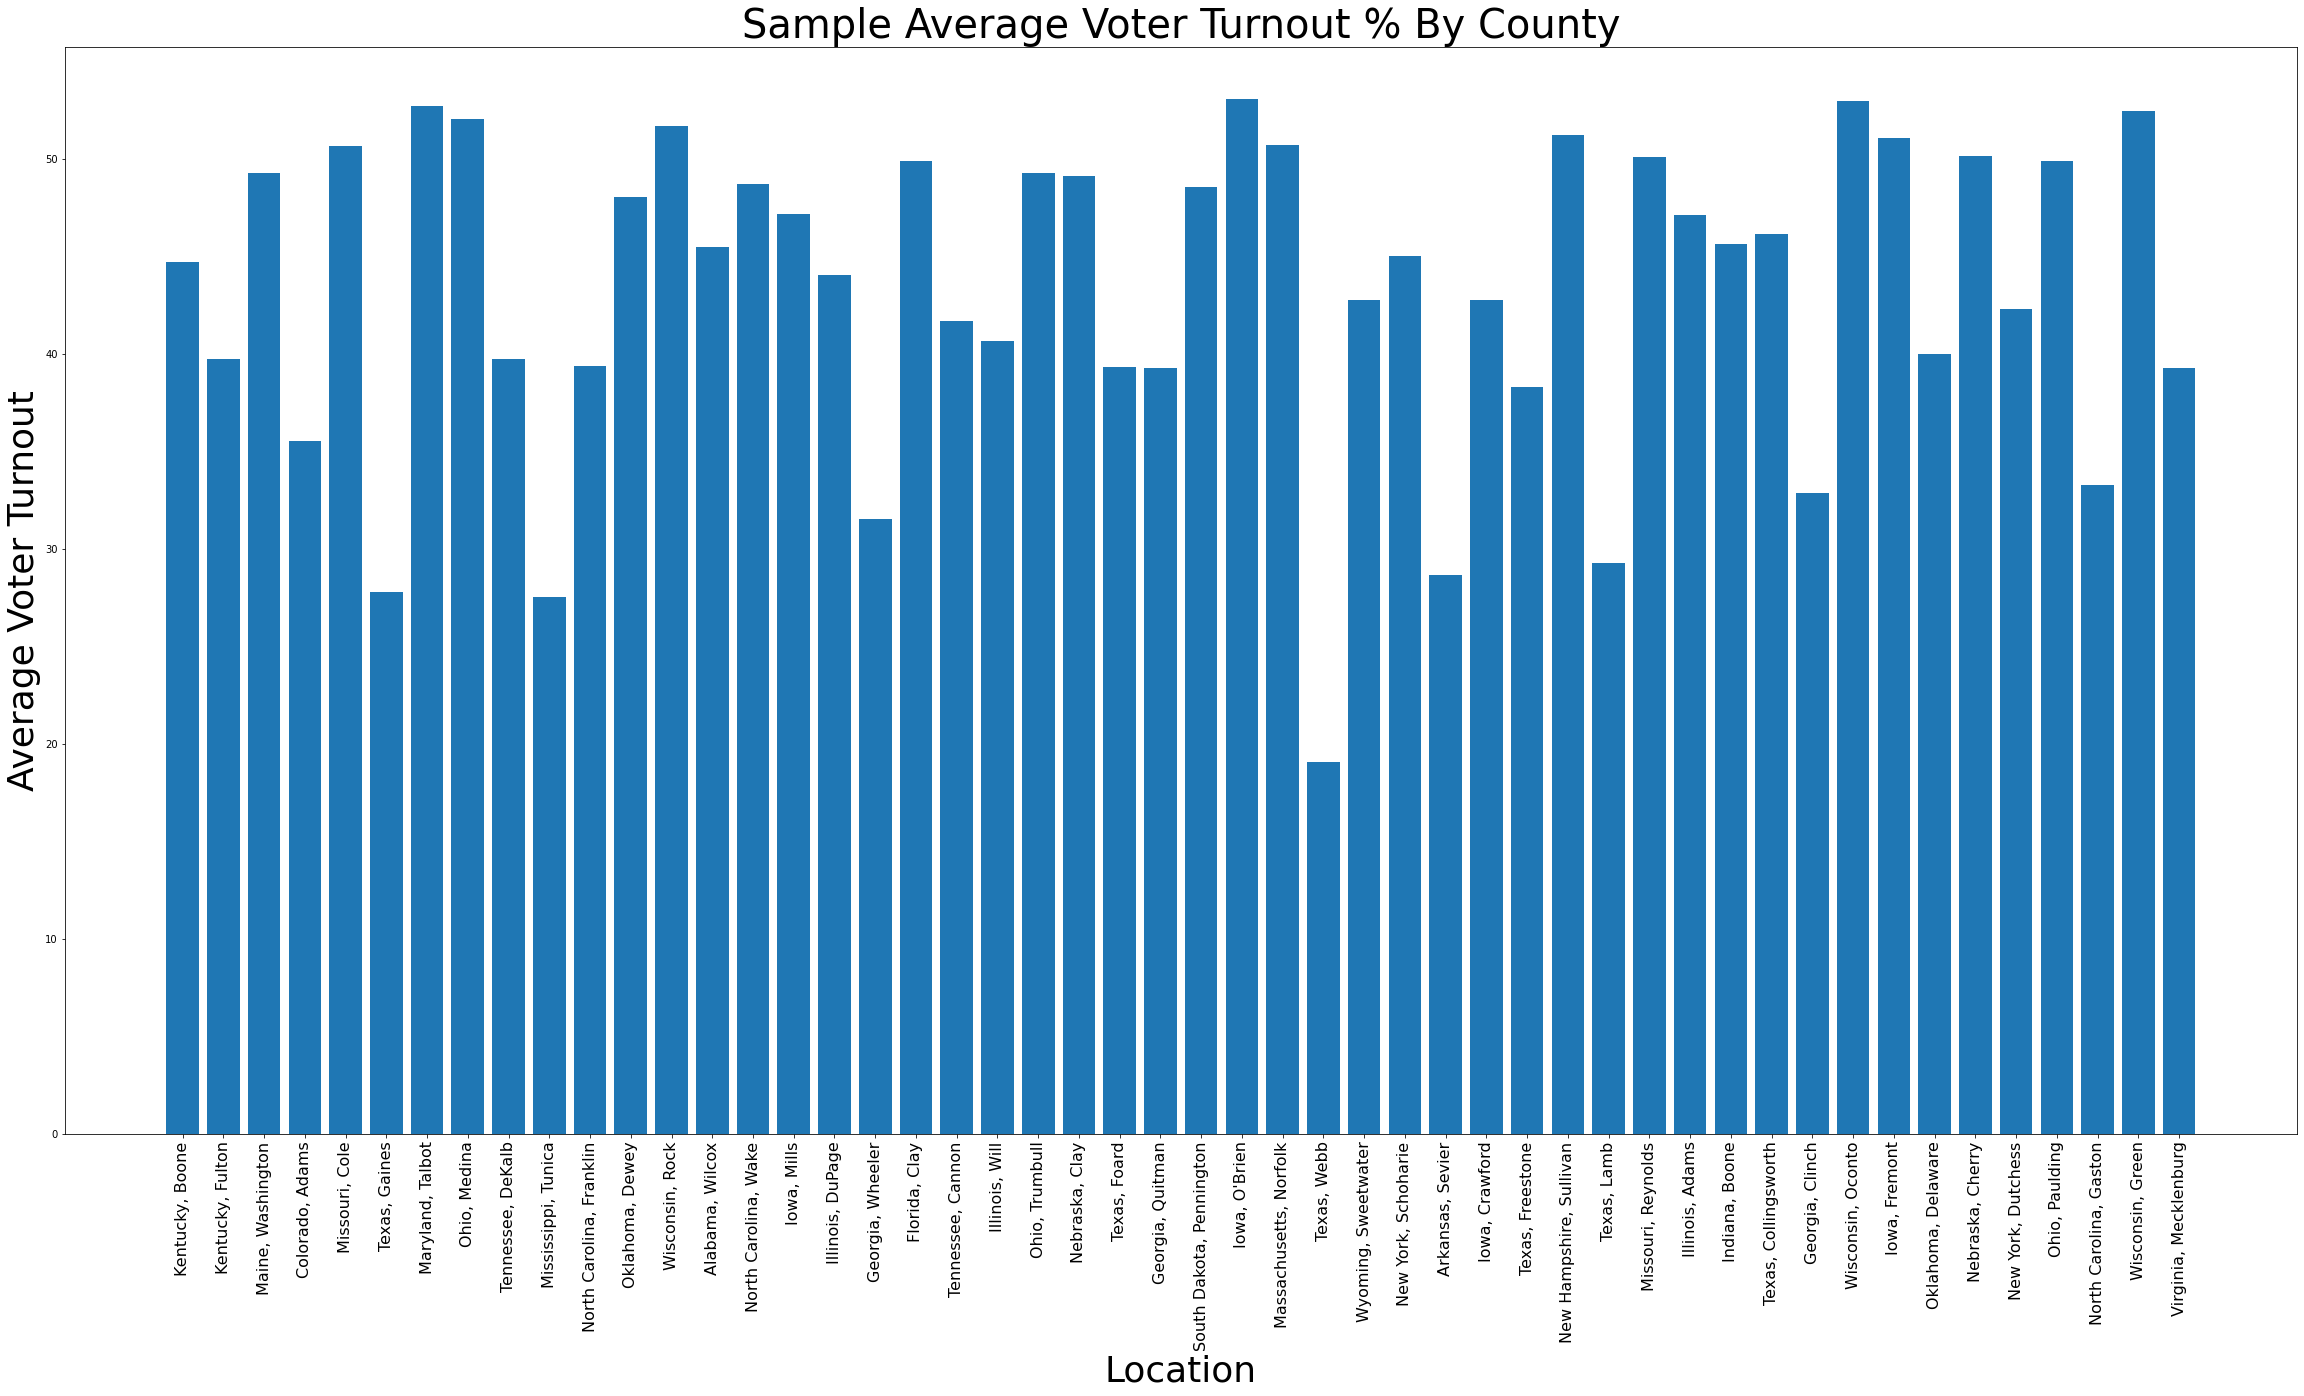

In [12]:
Avg_County_Turnout = Sample_County["Avg_Turnout"]
Location =  Sample_County["Location"]
plt.bar(Location, Avg_County_Turnout)
plt.title('Sample Average Voter Turnout % By County', fontsize=40)
plt.xlabel('Location', fontsize=36)
plt.ylabel('Average Voter Turnout', fontsize=36)
plt.xticks(rotation=90, fontsize=16)
plt.rcParams["figure.figsize"] = [100, 20]

plt.show()

In [13]:
Pop_County = County_Avg_Voter_Turnout_1['Avg_Turnout']
Sample_County = Avg_County_Turnout

stats.ttest_1samp(Sample_County, Pop_County.mean())

Ttest_1sampResult(statistic=-0.8432205689673106, pvalue=0.40320261773087007)

In [14]:
#5. Are there any outliers?
county_outliers = County_Avg_Voter_Turnout_1['Avg_Turnout']

quartiles = county_outliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of county_outliers is: {lowerq}")
print(f"The upper quartile of county_outliers is: {upperq}")
print(f"The interquartile range of county_outliers is: {iqr}")
print(f"The the median of county_outliers is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of county_outliers is: 39.2775
The upper quartile of county_outliers is: 49.622499999999995
The interquartile range of county_outliers is: 10.344999999999992
The the median of county_outliers is: 44.175 
Values below 23.760000000000016 could be outliers.
Values above 65.13999999999999 could be outliers.


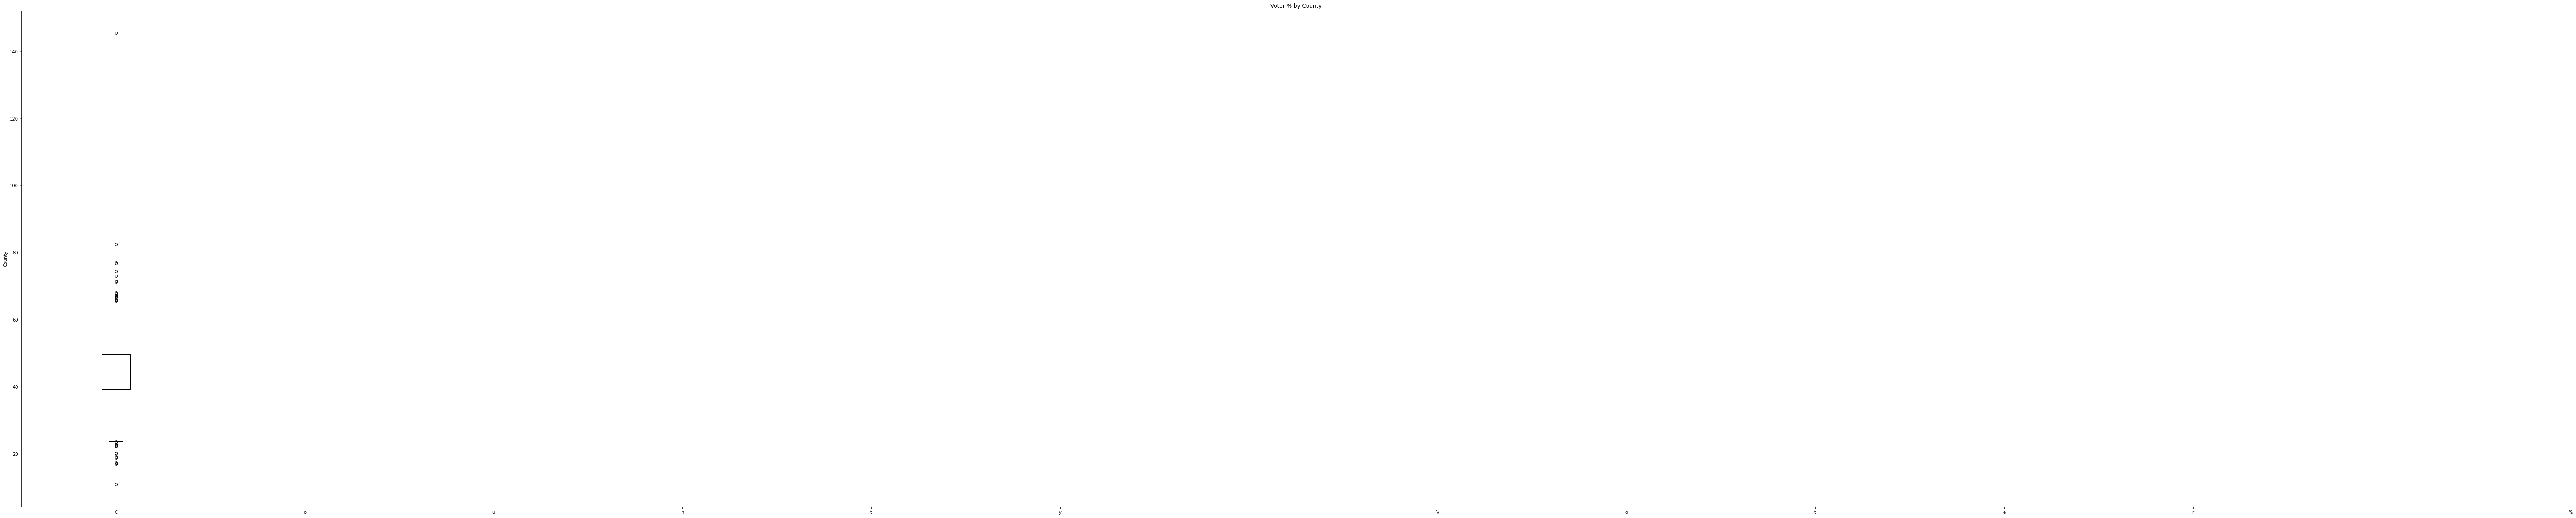

In [15]:
county_outliers = County_Avg_Voter_Turnout_1['Avg_Turnout']

##set data
data = [county_outliers]
##create labels for each boxplot for clarity
labels = ('County Voter %')
fig1, ax1 = plt.subplots()
ax1.boxplot(data)
## add titles and labels
ax1.set_title('Voter % by County')
ax1.set_ylabel('County')
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()

In [16]:
# 2. Which States have the highest / lowest average voter turnout?
#Line Graph

In [17]:
# 3. voter turnout vs population
#Stacked Bar Graph

In [18]:
#4. What is the avg population of the county compared to the voters on election day




In [19]:
#5. What is the voter turnout based on political party per state, county